In [66]:
import numpy as np
import os
import matplotlib.pyplot as plt

from skimage import io, img_as_ubyte, feature, color, segmentation, filters, exposure
from skimage import transform as tf
from skimage.filters import roberts, sobel, scharr, prewitt
from skimage.segmentation import felzenszwalb, slic, quickshift, mark_boundaries
from skimage.future import graph
from skimage.feature import CENSURE, greycomatrix, greycoprops
from skimage.util import img_as_float
from skimage.util.colormap import viridis

from scipy import ndimage as ndi
from glob import iglob

# io.use_plugin('matplotlib')

import sys
sys.path.append("/home/tanuj/Workspace/power-grid-detection")

import config

%matplotlib inline

In [11]:
filename = '/home/tanuj/Workspace/power-grid-detection/dataset/raw/256/positive/31285690.jpg'
examples_dir = '/home/tanuj/Workspace/power-grid-detection/dataset/raw/256/positive/'
files = iglob(examples_dir + '/*.jpg')

In [12]:
def edge_detection(image):
    image = color.rgb2gray(image)
    edge_roberts = roberts(image)
    edge_sobel = sobel(image)

    fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                           figsize=(8, 4))

    ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
    ax[0].set_title('Roberts Edge Detection')

    ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
    ax[1].set_title('Sobel Edge Detection')

    for a in ax:
        a.axis('off')

    plt.tight_layout()
    plt.show()

In [13]:
def feature_detection(img_orig):
    img_orig = rgb2gray(image)
    tform = tf.AffineTransform(scale=(1.5, 1.5), rotation=0.5,
                               translation=(150, -200))
    img_warp = tf.warp(img_orig, tform)

    detector = CENSURE()

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    detector.detect(img_orig)

    ax[0].imshow(img_orig, cmap=plt.cm.gray)
    ax[0].scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
                  2 ** detector.scales, facecolors='none', edgecolors='r')

    detector.detect(img_warp)

    ax[1].imshow(img_warp, cmap=plt.cm.gray)
    ax[1].scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
                  2 ** detector.scales, facecolors='none', edgecolors='r')

    for a in ax:
        a.axis('off')

    plt.tight_layout()
    plt.show()

In [14]:
def rag_region(image):
    gimg = color.rgb2gray(image)

    labels = segmentation.slic(image, compactness=30, n_segments=400)
    edges = filters.sobel(gimg)
    edges_rgb = color.gray2rgb(edges)

    g = graph.rag_boundary(labels, edges)
    lc = graph.show_rag(labels, g, edges_rgb, img_cmap=None, edge_cmap='viridis',
                        edge_width=1.2)

    plt.colorbar(lc, fraction=0.03)
    io.show()

In [17]:
def super_segment(image):
    img = img_as_float(image[::2, ::2])
    segments_fz = felzenszwalb(img, scale=100, sigma=0.5, min_size=50)
    segments_slic = slic(img, n_segments=250, compactness=10, sigma=1)
    segments_quick = quickshift(img, kernel_size=3, max_dist=6, ratio=0.5)

    print("Felzenszwalb's number of segments: %d" % len(np.unique(segments_fz)))
    print("Slic number of segments: %d" % len(np.unique(segments_slic)))
    print("Quickshift number of segments: %d" % len(np.unique(segments_quick)))

    fig, ax = plt.subplots(1, 3, sharex=True, sharey=True,
                           subplot_kw={'adjustable': 'box-forced'})
    fig.set_size_inches(8, 3, forward=True)
    fig.tight_layout()

    ax[0].imshow(mark_boundaries(img, segments_fz))
    ax[0].set_title("Felzenszwalbs's method")
    ax[1].imshow(mark_boundaries(img, segments_slic))
    ax[1].set_title("SLIC")
    ax[2].imshow(mark_boundaries(img, segments_quick))
    ax[2].set_title("Quickshift")
    for a in ax:
        a.set_xticks(())
        a.set_yticks(())
    plt.show()

In [18]:
def region_rag(img):
#     img = data.coffee()
    labels = segmentation.slic(img, compactness=30, n_segments=400)
    g = graph.rag_mean_color(img, labels)

    out = graph.draw_rag(labels, g, img)
    plt.figure()
    plt.title("RAG with all edges shown in green.")
    plt.imshow(out)

    # The color palette used was taken from
    # http://www.colorcombos.com/color-schemes/2/ColorCombo2.html
    cmap = colors.ListedColormap(['#6599FF', '#ff9900'])
    out = graph.draw_rag(labels, g, img, node_color="#ffde00", colormap=cmap,
                         thresh=30, desaturate=True)
    plt.figure()
    plt.title("RAG with edge weights less than 30, color "
              "mapped between blue and orange.")
    plt.imshow(out)

    plt.figure()
    plt.title("All edges drawn with viridis colormap")
    out = graph.draw_rag(labels, g, img, colormap=viridis,
                         desaturate=True)

    plt.imshow(out)
    plt.show()

(256, 256, 3)


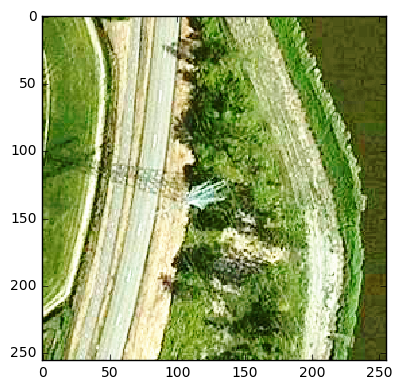

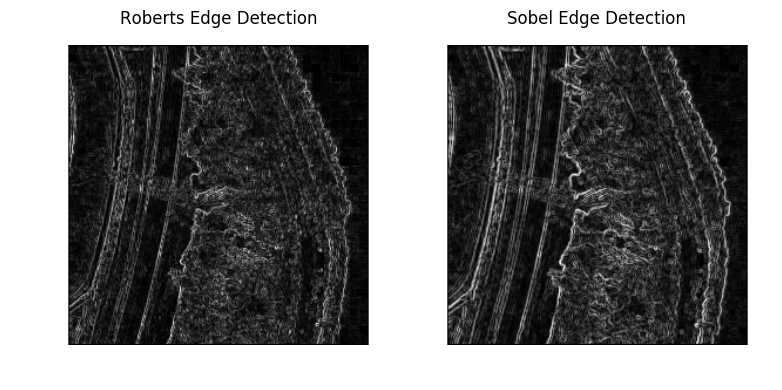

Felzenszwalb's number of segments: 9
Slic number of segments: 233
Quickshift number of segments: 304


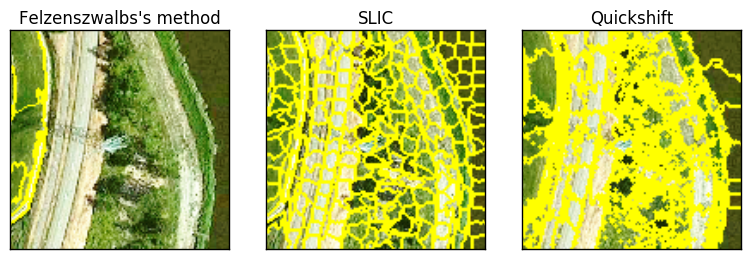

In [78]:
f = next(files)

if f is not None:
    image = io.imread(f)
    image = img_as_ubyte(image)
    io.imshow(image)
    image = exposure.equalize_hist(image)
    io.imshow(image)
    print(image.shape)
    edge_detection(image)
#     feature_detection(image)
#     region_rag(image)
    super_segment(image)